# TD 2A : Calcul Matriciel, Optimisation

INTRO SUR LE POURQUOI DE CE TD

* [Numpy arrays](#ndarray)
    * [Création, Datatype et Dimensions](#creation)
    * [Indexation, Slicing, Fancy indexing](#idx)
    * [View contre copy](#view_vs_copy)
    * [Manipulation de shape](#reshape)
    * [Exercice 1: Echiquier, Piège et Crible ](#exo1)
* [Manipulation et Opérations sur les arrays](#routines)
    * [Opérations élément par élément](#elementwise)
    * [Broadcasting](#broadcasting)
* [Algèbre linéaire](#linalg)
    * [Exemples simples](#basic)
    * [La sous classe Matrix](#matrix)
* [Génération de nombres aléatoires et statistiques](#random)
    * [Exercice 2: Marches aléatoires](#exo2)
* [Optimisation avec scipy](#optim)
    * [Exercice 3: Simulation, Regression, Estimation par maximisation de la vraisemblance](#exo3)
* [Optimisation quadratique (sous contraintes) avec cvxopt](#cvxopt)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h3 id="ndarray">Numpy arrays</h3>

La convention d'import classique de numpy est la suivante:

In [1]:
import numpy as np

<h4 id="creation">Creation d'un array: notion de datatype, et dimensions</h4>

On part d'une liste python contenant des entiers. On peut créer un array numpy à partir de cette liste. 
Cet array possède des attributs indiquant le data type, le nombre de dimensions de l'array, etc...

In [2]:
l = [1, 42, 18 ]
a = np.array(l)
print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)
print(a.size)
a


[ 1 42 18]
int32
1
(3,)
3


array([ 1, 42, 18])

On peut indiquer explicitement le dtype lors de la création de l'array. Sinon, Numpy sélectionne automatiquement le dtype.
Numpy ajoute un grand nombre de dtype à ceux de Python. Allez jeter un oeil à la [liste](http://docs.scipy.org/doc/numpy/user/basics.types.html). 

In [3]:
b = np.array(l, dtype=float)
print(b)
print(b.dtype)

[  1.  42.  18.]
float64


In [4]:
l[0] = 1.0
bb = np.array(l)
print(bb)
print(bb.dtype)

[  1.  42.  18.]
float64


Assigner un float dans un array de type int va caster le float en int, et ne modifie pas le dtype de l'array.

In [5]:
a[0] = 2.5 
a

array([ 2, 42, 18])

On peut forcer le casting dans un autre type avec astype

In [6]:
aa = a.astype(float)
aa[0] = 2.5
aa

array([  2.5,  42. ,  18. ])

A partir d'une liste de listes, on obtient un array bi-dimmensionnel.

On peut le transposer ou encore l'aplatir en un array 1d

In [7]:
c = np.array([range(5), range(5,10), range(5)])
print(c)
print("ndim:{}".format(c.ndim))
print("shape:{}".format(c.shape))
print(c.transpose()) #same as c.T
print("shape transposed:{}".format(c.T.shape))
print(c.flatten())
print("ndim flattened:{}".format(c.flatten().ndim))

[[0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]]
ndim:2
shape:(3, 5)
[[0 5 0]
 [1 6 1]
 [2 7 2]
 [3 8 3]
 [4 9 4]]
shape transposed:(5, 3)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]
ndim flattened:1


<h3 id="idx">Indexation, Slicing, Fancy indexing</h3>

In [8]:
print(c)

[[0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]]


L'indexation des array multidimensionnels fonctionne avec des tuples.

La syntaxe ':' permet d'obtenir tous les éléments de la dimension.



In [9]:
print(c[1,3])
print(c[1,:3])
print(c[:,4])

8
[5 6 7]
[4 9 4]


Si on utilise pas un couple sur un array 2d on récupère un array 1d

In [10]:
print(c[1], c[1].shape)
print(c[1][:3])

[5 6 7 8 9] (5,)
[5 6 7]


On peut aussi utiliser l'indexation par un array (ou une liste python) de booléens ou d'entiers (un mask). Cela s'appelle le fancy indexing. Un mask d'entiers permet de désigner les éléments que l'on souhaite extraire via la liste de leurs indices, on peut aussi répéter l'indice d'un élément pour répéter l'élement dans l'array que l'on extrait.

In [11]:
ar = np.arange(1,10) #arange est l'equivalent de range mais retourne un numpy array
print('ar = ',ar)
idx = np.array([1, 4, 3, 2, 1, 7, 3])
print('idx = ',idx)
print("ar[idx] =", ar[idx])
print('######')
idx_bool = np.ones(ar.shape, dtype=bool)
idx_bool[idx] = False
print('idx_bool = ', idx_bool)
print('ar[idx_bool] = ', ar[idx_bool])
print('######', 'Que se passe-t-il dans chacun des cas suivants?', '######' )
print('ar[[True, True, False, True]] = ', ar[[True, True, False, True]])
print('ar[np.array([True, True, False, True])] = ', ar[np.array([True, True, False, True])])

ar =  [1 2 3 4 5 6 7 8 9]
idx =  [1 4 3 2 1 7 3]
ar[idx] = [2 5 4 3 2 8 4]
######
idx_bool =  [ True False False False False  True  True False  True]
ar[idx_bool] =  [1 6 7 9]
###### Que se passe-t-il dans chacun des cas suivants? ######
ar[[True, True, False, True]] =  [2 2 1 2]
ar[np.array([True, True, False, True])] =  [1 2 4]


-c:12: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


Pourquoi parle-t-on de fancy indexing? Essayez d'indexer des listes python de la même manière...

In [12]:
list_python = range(10)
list_python[[True, True, False, True]] # déclenche une exception

TypeError: range indices must be integers or slices, not list

In [13]:
list_python[[2, 3, 2, 7]]  # déclenche une exception

TypeError: range indices must be integers or slices, not list

<h4 id"view_vs_copy">View contre Copy</h4>

Créons un array $d$. En plus de renvoyer directement un array, la fonction arange permet aussi d'utiliser un step flottant. (Essayer avec le range de python pour voir)

In [ ]:
d = np.arange(1, 6, 0.5)
d

Un point important est que l'on ne recopie pas un array lorsqu'on effectue une assignation ou un slicing d'un array.
On travaille dans ce cas avec une View sur l'array d'origine (shallow copy). Toute modification sur la View affecte l'array d'origine.

Dans l'exemple qui suit, $e$ est une view sur $d$. Lorsqu'on modifie $e$, $d$ aussi est modifié. (Remarquez au passage que numpy fournit quelques constantes bien pratiques....)

In [ ]:
e = d
e[[0,2, 4]] = - np.pi
e

In [ ]:
d

Si on ne veut pas modifier $d$ indirectement, il faut travailler sur une copie de $d$ (deep copy).

In [ ]:
d = np.linspace(1,5.5,10) #Question subsidiaire: en quoi est-ce différent de np.arange avec un step float?
f = d.copy()
f[:4] = -np.e #il s'agit du nombre d'euler, pas de l'array e ;)
print(f)
print(d)

Ce point est important car source classique d'erreurs silencieuses: les erreurs les plus vicieuses car l'output sera faux mais python ne ralera pas...

Il faut un peu de temps pour s'habituer mais on finit par savoir de manière naturelle quand on travaille sur une view, quand on a besoin de faire une copie explicitement, etc... En tout cas, vérifiez vos sorties, faites des tests de cohérence, cela ne nuit jamais.

Retenez par exemple que le slicing vous renvoie une view sur l'array, alors que le fancy indexing effectue une copie.

(Au passage, remarquez le NaN (=NotaNumber) déjà introduit lors de la séance 1 sur pandas qui est un module basé sur numpy)

In [ ]:
print('d = ',d)
slice_of_d = d[2:5]
print('slice_of_d = ', slice_of_d)
slice_of_d[0] = np.nan
print('d = ', d)
mask = np.array([2, 3, 4])
fancy_indexed_subarray = d[mask]
print('fancy_indexed_subarray = ', fancy_indexed_subarray)
fancy_indexed_subarray[0] = -2
print('d = ', d)


<h4 id="reshape">Manipulation de shape</h4>

La méthode reshape permet de changer la forme de l'array. Il existe de nombreuses [manipulations possibles](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

On précise à reshape la forme souhaitée: par un entier si on veut un array 1d de cette longueur, ou un couple pour un array 2d de cette forme.

In [13]:
g = np.arange(12)
print(g)
g.reshape((4,3))


[ 0  1  2  3  4  5  6  7  8  9 10 11]


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Par défaut, reshape utilise l'énumération dans l'ordre du langage C (aussi appelé "row first" ), on peut préciser que l'on souhaite utiliser l'ordre de Fortran ("column first"). Ceux qui connaissent Matlab et R sont habitués à l'ordre "column-first". [Voir l'article wikipedia](http://en.wikipedia.org/wiki/Row-major_order)

In [14]:
g.reshape((4,3), order='F')

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

On peut utiliser -1 sur une dimension, cela sert de joker: numpy infère la dimension nécessaire!

On peut créer directement des matrices de 0 et de 1 à la dimension d'un autre array

In [15]:
np.zeros_like(g)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
np.ones_like(g)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

On peut aussi concatener ou stacker horizontalement/verticalement différents arrays.

In [17]:
np.concatenate((g, np.zeros_like(g))) #Attention à la syntaxe: le type d'entrée est un couple!

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [18]:
np.concatenate((g, np.ones_like(g)), axis=1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [19]:
np.hstack((g, g))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11])

In [20]:
np.vstack((g,g))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

<h4 id="exo1">Exercice 1: Echiquier et Crible d'Erathosthene</h4>

* Exercice 1-A Echiquier: Créer une matrice échiquier (des 1 et des 0 alternés) de taille 8x8, de deux façons différentes
    * en vous servant de slices 
    * en vous servant de la fonction [tile](http://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html#numpy.tile)
* Exercice 1-B Piège lors d'une extraction 2d:
    * Définir la matrice $M = \left(\begin{matrix}
                                   1 & 5 & 9 & 13 & 17\\
                                   2 & 6 & 10 & 14& 18\\
                                   3 & 7 & 11 & 15& 19\\
                                   4 & 8 & 12 & 16& 20 \\
                             \end{matrix}\right)$
    * En **extraire** la matrice $\left(\begin{matrix}
                                    6 & 18 & 10 \\
                                    7 & 19 & 11 \\
                                    5 & 17 & 9 \\
                             \end{matrix}\right)$
* Exercice 1-C Crible d'Erathosthene: On souhaite implémenter un [crible d'Erathosthène](http://fr.wikipedia.org/wiki/Crible_d'%C3%89ratosth%C3%A8ne) pour trouver les nombres premiers inférieurs à $N=1000$.
    * partir d'un array de booléens de taille N+1, tous égaux à True.
    * Mettre 0 et 1 à False car ils ne sont pas premiers
    * pour chaque entier $k$ entre 2 et $\sqrt{N}$: 
        * si $k$ est premier: on passe ses multiples (entre $k^2$ et $N$) à False
    * on print la liste des entiers premiers

In [21]:
#Exo1a-1:

#Exo1a-2:


[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]
[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


In [22]:
#Exo1B:


[[ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]
 [ 4  8 12 16 20]]
WRONG: [ 6 19  9]
########
[[ 6 18 10]
 [ 7 19 11]
 [ 5 17  9]]
(array([[1],
       [2],
       [0]]), array([[1, 4, 2]]))
[[ 6 18 10]
 [ 7 19 11]
 [ 5 17  9]]


In [23]:
#Exo1C:

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97]


<h3 id="routines">Manipulation et Opérations sur les arrays</h3>

Il existe un très grand nombre de [routines pour manipuler les arrays numpy](http://docs.scipy.org/doc/numpy/reference/routines.html): 
Vous trouverez sans doute utiles les pages spécifiques aux routines de [stats](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html) ou de [maths](http://docs.scipy.org/doc/numpy/reference/routines.math.html)



<h4 id="elementwise">Opérations élément par élément</h4>

On déclare $a$ et $b$ sur lesquelles nous allons illustrer quelques opérations

In [24]:
a = np.ones((3,2))
b = np.arange(6).reshape(a.shape)
print(a)
b

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]


array([[0, 1],
       [2, 3],
       [4, 5]])

Les opérations arithmétiques avec les scalaires, ou entre arrays s'effectuent élément par élément.
Lorsque le dtype n'est pas le même ($a$ contient des float, $b$ contient des int), numpy adopte le type le plus "grand" (au sens de l'inclusion).


In [25]:
print( (a + b)**2 )
print( np.abs( 3*a - b ) )
f = lambda x: np.exp(x-1)
print( f(b) )

[[  1.   4.]
 [  9.  16.]
 [ 25.  36.]]
[[ 3.  2.]
 [ 1.  0.]
 [ 1.  2.]]
[[  0.36787944   1.        ]
 [  2.71828183   7.3890561 ]
 [ 20.08553692  54.59815003]]


Remarquez que la division par zéro ne provoque pas d'erreur mais juste un warning

In [26]:
1/b

-c:1: RuntimeWarning: divide by zero encountered in true_divide


array([[        inf,  1.        ],
       [ 0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ]])

### <h4 id="broadcasting">Broadcasting</h4>

Que se passe-t-il si les dimensions sont differentes?

In [27]:
c = np.ones(6)
c

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [28]:
b+c   # déclenche une exception

ValueError: operands could not be broadcast together with shapes (3,2) (6,) 

In [ ]:
c = np.arange(3).reshape((3,1))
print(b,c, sep='\n')
b+c

L'opération précédente fonctionne car numpy effectue ce qu'on appelle un broadcasting de c: une dimension etant commune, tout se passe comme si on dupliquait c sur la dimension non-partagée avec b. Vous trouverez une explication visuelle simple [ici](http://www.tp.umu.se/~nylen/pylect/intro/numpy/numpy.html#broadcasting)

In [ ]:
a = np.zeros((3,3))
a[:,0] = -1
b = np.array(range(3))
print(a + b)


Par contre, il peut parfois être utile de préciser la dimension sur laquelle on souhaite broadcaster, on ajoute alors explicitement une dimension:

In [29]:
print(b.shape)
print(b[:,np.newaxis].shape) 
print(b[np.newaxis,:].shape)

(3, 2)
(3, 1, 2)
(1, 3, 2)


In [30]:
print( a + b[np.newaxis,:] )
print( a + b[:,np.newaxis] )
print(b[:,np.newaxis]+b[np.newaxis,:])
print(b + b)

[[[ 1.  2.]
  [ 3.  4.]
  [ 5.  6.]]]
[[[ 1.  2.]
  [ 1.  2.]
  [ 1.  2.]]

 [[ 3.  4.]
  [ 3.  4.]
  [ 3.  4.]]

 [[ 5.  6.]
  [ 5.  6.]
  [ 5.  6.]]]
[[[ 0  2]
  [ 2  4]
  [ 4  6]]

 [[ 2  4]
  [ 4  6]
  [ 6  8]]

 [[ 4  6]
  [ 6  8]
  [ 8 10]]]
[[ 0  2]
 [ 4  6]
 [ 8 10]]


### <h4 id="Reductions">Réductions</h4>

On parle de réductions lorsque l'opération réduit la dimension de l'array.

Il en existe un grand nombre. Elles existent souvent sous forme de fonction de numpy ou de méthodes d'un array numpy.
On n'en présente que quelques unes, mais le principe est le même: par défaut elles opèrent sur toutes les dimensions, mais on peut via l'argument *axis* préciser la dimension selon laquelle on souhaite effectuer la réduction.

In [31]:
c = np.arange(10).reshape((2,-1)) #Note: -1 is a joker! 
print(c)
print(c.sum())
print(c.sum(axis=0))
print(np.sum(c, axis=1))

[[0 1 2 3 4]
 [5 6 7 8 9]]
45
[ 5  7  9 11 13]
[10 35]


In [32]:
print(np.all(c[0] < c[1]))
print(c.min(), c.max())
print(c.min(axis=1))

True
0 9
[0 5]


<h3 id="linalg">Algèbre linéaire</h3>

Vous avez un éventail de fonctions pour faire de l'algèbre linéaire dans [numpy](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) ou dans [scipy](http://docs.scipy.org/doc/scipy/reference/linalg.html).
Cela peut vous servir si vous cherchez à faire une décomposition matricielle particulière (LU, QR, SVD,...), si vous vous intéressez aux valeurs propres d'une matrice, etc...

<h4 id="basic">Exemples simples</h4>

Commençons par construire deux arrays 2d correspondant à une matrice triangulaire inférieure et une matrice diagonale

In [33]:
A = np.tril(np.ones((3,3)))
A

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.]])

In [34]:
b = np.diag([1,2, 3])
b

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

On a vu que les multiplications entre array s'effectuaient élément par élement.
Si l'on souhaite faire des multiplications matricielles, il faut utiliser la fonction dot.

In [52]:
print(A.dot(b))
print(A*b)
print(A.dot(A))

[[ 3.  0.  0.]
 [ 3.  3.  0.]
 [ 3.  3.  3.]]
[[ 3.  0.  0.]
 [ 3.  3.  0.]
 [ 3.  3.  3.]]
[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [ 3.  2.  1.]]


On peut calculer l'inverse ou le déterminant de $A$

In [ ]:
print(np.linalg.det(A))
inv_A = np.linalg.inv(A)
print(inv_A)
print(inv_A.dot(A))

... résoudre des systèmes d'equations linéaires du type $Ax = b$...

In [ ]:
x = np.linalg.solve(A, np.diag(b))
print(np.diag(b))
print(x)
print(A.dot(x))

... ou encore obtenir les valeurs propres de $A$.

In [ ]:
np.linalg.eig(A)

In [ ]:
np.linalg.eigvals(A)

<h4 id="matrix">Numpy Matrix</h4>

Matrix est une sous classe spécialisée pour le calcul matriciel. Il s'agit d'un array numpy 2d qui conserve sa dimension 2d à travers les opérations. Pensez aux différences que cela implique...
On peut les construire classiquement depuis les array ou les objets pythons, ou via une string à la Matlab ( où les points virgules indiquent les lignes).

In [36]:
m = np.matrix(' 1 2 3; 4 5 6; 7 8 9')
a = np.arange(1,10).reshape((3,3))
print(m)
print(a)
print(m[0], a[0])
print(m[0].shape, a[0].shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]] [1 2 3]
(1, 3) (3,)


Matrix surcharge par ailleurs les opérateurs \* et \** pour remplacer les opérations élément par élément par les opérations matricielles.
Enfin, une Matrix possède des attributs supplémentaires. Notamment, Matrix.I qui désigne l'inverse, Matrix.A l'array de base.

In [37]:
m * m

matrix([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])

In [38]:
a * a

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [39]:
m * a # La priorité des matrix est plus importantes que celles des arrays

matrix([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])

In [40]:
print(m**2)
print(a**2)

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


La syntaxe est plus légère pour effectuer du calcul matriciel

In [41]:
m[0,0]= -1
print("det", np.linalg.det(m), "rank",np.linalg.matrix_rank(m))
print(m.I*m)
a[0,0] = -1
print("det", np.linalg.det(a), "rank",np.linalg.matrix_rank(a))
print(a.dot(np.linalg.inv(a)))

det 6.0 rank 3
[[  1.00000000e+00  -1.33226763e-15  -1.77635684e-15]
 [  3.55271368e-15   1.00000000e+00   7.10542736e-15]
 [ -1.77635684e-15  -3.55271368e-15   1.00000000e+00]]
det 6.0 rank 3
[[  1.00000000e+00   1.77635684e-15  -8.88178420e-16]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


<h3 id="random">Génération de nombres aléatoires et statistiques</h3>

Le module [numpy.random](http://docs.scipy.org/doc/numpy/reference/routines.random.html) apporte à python la possibilité de générer un échantillon de taille $n$ directement, alors que le module natif de python ne produit des tirages que un par un. Le module numpy.random est donc bien plus efficace si on veut tirer des échantillon conséquents. Par ailleurs, [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) fournit des méthodes pour un très grand nombre de distribution et quelques fonctions classiques de statistiques. 

Par exemple, on peut obtenir un array 4x3 de tirages gaussiens standard (soit en utilisant [*randn*](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html#numpy.random.randn) ou [*normal*](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal)):

In [51]:
np.random.randn(4,3)

array([[-0.64255699,  1.47320845,  1.6036177 ],
       [ 1.82778282,  0.65999718,  0.80569957],
       [ 1.10103971,  0.77174868, -0.54602931],
       [-0.17836649,  0.80284524, -1.38777388]])

Pour se convaincre que *numpy.random* est plus efficace que le module *random* de base de python. On effectue un grand nombre de tirage gaussiens standard, en python pur et via numpy.


In [43]:
N = int(1e7)
from random import normalvariate
%timeit [normalvariate(0,1) for _ in range(N)]

1 loops, best of 3: 24.5 s per loop


In [44]:
%timeit np.random.randn(N)

1 loops, best of 3: 770 ms per loop


<h4 id="exo2">Exercice 2: Marches aléatoires</h4>

Simulez (**en une seule fois!**) 10000 marches aléatoires de taille 1000, partant de 0 et de pas +1 ou -1 équiprobables 

* Faites un graphe représentant la racine de la moyenne des carrés des positions (=cumul des pas à un instant donné) en fonction du temps
* Quels sont les amplitudes maximales et minimales atteintes parmi l'ensemble des marches aléatoires?
* Combien de marches s'éloigne de plus de 50 de l'origine?
* Parmi celles qui le font, quelle est la moyenne des temps de passage (i.e. le premier moment où ces marches dépassent +/-50)?

Vous aurez peut-être besoin des fonctions suivantes: *np.abs, np.mean, np.max, np.where, np.argmax, np.any, np.cumsum, np.random.randint*

<h3 id="optim">Optimisation avec scipy</h3>


Le module [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html) fournit un panel de méthodes d'optimisation. En fonction du problème que vous souhaitez résoudre, il vous faut choisir la méthode adéquate. Je vous conseille vivement la lecture de ce [tutoriel](http://scipy-lectures.github.io/advanced/mathematical_optimization/index.html) sur l'optimisation numérique, écrit par Gaël Varoquaux. 



Récemment, l'ensemble des solvers ont été regroupés sous deux interfaces, même si on peut toujours faire appel à chaque solver directement, ce qui n'est pas conseillé car les entrées sorties ne sont pas normalisées (par contre vous devrez sans doute aller voir l'aide de chaque méthode pour vous en servir): 

* Pour minimiser une fonction scalaire d'une ou plusieurs variables:[scipy.optimize.minimize](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
* Pour minimiser une fonction scalaire d'une variable uniquement:[scipy.optimize.minimize_scalar](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar)

Vous obtiendrez en sortie un objet de type [scipy.optimize.OptimizeResult](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult).

Dans la suite, je développe un petit exemple inspiré du [tutoriel](http://www.mathworks.fr/fr/help/optim/examples/tutorial-for-the-optimization-toolbox.html#zmw57dd0e494) de la toolbox d'optimisation de Matlab. Par ailleurs, la [documentation](http://www.mathworks.fr/fr/help/optim/ug/unconstrained-nonlinear-optimization-algorithms.html#brnoxxo) de cette toolbox est plutôt claire et peut toujours vous servir lorsque que vous avez besoin de vous rafraichir la mémoire sur l'optimisation numérique.

On commence par définir la fonction *bowl_peak*

In [2]:
def bowl_peak(x,y): 
    return x*np.exp(-x**2-y**2)+(x**2+y**2)/20

On va ensuite chercher un exemple dans la gallerie matplotlib pour la représenter: [contour3d_demo3](http://matplotlib.org/examples/mplot3d/contour3d_demo3.html). On modifie légèrement le code pour l'utiliser avec *bowl_peak*

(-0.5, 0.5)

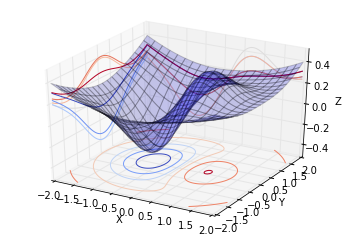

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm #colormaps

min_val = -2
max_val = 2

fig = plt.figure()
ax = fig.gca(projection='3d')
x_axis = np.linspace(min_val,max_val,100)
y_axis = np.linspace(min_val,max_val,100)
X, Y = np.meshgrid(x_axis, y_axis, copy=False, indexing='xy')
Z = bowl_peak(X,Y)
#X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, alpha=0.2)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=min_val, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=max_val, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(min_val, max_val)
ax.set_ylabel('Y')
ax.set_ylim(min_val, max_val)
ax.set_zlabel('Z')
ax.set_zlim(-0.5, 0.5)

On voit que le minimum se trouve près de $[-\frac{1}{2}, 0]$. On va utiliser ce point pour initialiser l'optimisation.
On va tester différentes méthodes et comparer les sorties obtenues.

In [4]:
from scipy import optimize
x0 = np.array([-0.5, 0])
fun = lambda x: bowl_peak(x[0],x[1])
methods = [ 'Nelder-Mead', 'CG', 'BFGS', 'Powell', 'COBYLA', 'L-BFGS-B' ]
for m in methods:
    optim_res = optimize.minimize(fun, x0, method=m)
    print("Method:{}\n".format(m),optim_res, "\n")

Method:Nelder-Mead
  message: 'Optimization terminated successfully.'
    nfev: 38
     nit: 20
     fun: -0.40523685823917283
       x: array([ -6.69025421e-01,  -1.44567490e-04])
 success: True
  status: 0 

Method:CG
     njev: 3
 message: 'Desired error not necessarily achieved due to precision loss.'
     fun: -0.4052368583334503
  status: 2
    nfev: 24
     jac: array([ -2.12926418e-04,   3.72529030e-09])
       x: array([ -6.69183901e-01,  -3.71395638e-09])
 success: False 

Method:BFGS
  hess_inv: array([[ 0.52865446,  0.        ],
       [ 0.        ,  1.        ]])
     njev: 7
  message: 'Optimization terminated successfully.'
      fun: -0.40523687025688715
   status: 0
     nfev: 28
      jac: array([ -6.08339906e-06,   0.00000000e+00])
        x: array([ -6.69075034e-01,  -7.45058060e-09])
  success: True 

Method:Powell
  message: 'Optimization terminated successfully.'
     fun: -0.40523687026669025
  status: 0
    nfev: 62
   direc: array([[  0.00000000e+00,   1.00000

On trouve un minimum à $-0.4052$ en $[-0.669, 0.000]$ pour toutes les méthodes qui convergent. Notez le message de sortie de 'CG' qui signifie que le gradient ne varie plus assez. Personnellement, je ne trouve pas ce message de sortie très clair. Le point trouvé est bien l'optimum cherché pourtant. Notez aussi le nombre d'évaluation de la fonction (*nfev*) pour chaque méthode, et le nombre d'évaluation de gradient (*njev*) pour les méthodes qui reposent sur un calcul de gradient.

Remarquez aussi que si on relance *Anneal* plusieurs fois, on n'est pas assuré d'obtenir la même solution, puisqu'il s'agit d'une métaheuristique.

In [5]:
for i in range(4):
    optim_res = optimize.minimize(fun, x0, method='BFGS')
    print("Method:{} - Test:{}\n".format(m,i),optim_res, "\n")

Method:L-BFGS-B - Test:0
  hess_inv: array([[ 0.52865446,  0.        ],
       [ 0.        ,  1.        ]])
     njev: 7
  message: 'Optimization terminated successfully.'
      fun: -0.40523687025688715
   status: 0
     nfev: 28
      jac: array([ -6.08339906e-06,   0.00000000e+00])
        x: array([ -6.69075034e-01,  -7.45058060e-09])
  success: True 

Method:L-BFGS-B - Test:1
  hess_inv: array([[ 0.52865446,  0.        ],
       [ 0.        ,  1.        ]])
     njev: 7
  message: 'Optimization terminated successfully.'
      fun: -0.40523687025688715
   status: 0
     nfev: 28
      jac: array([ -6.08339906e-06,   0.00000000e+00])
        x: array([ -6.69075034e-01,  -7.45058060e-09])
  success: True 

Method:L-BFGS-B - Test:2
  hess_inv: array([[ 0.52865446,  0.        ],
       [ 0.        ,  1.        ]])
     njev: 7
  message: 'Optimization terminated successfully.'
      fun: -0.40523687025688715
   status: 0
     nfev: 28
      jac: array([ -6.08339906e-06,   0.00000000e+0

On va évaluer le temps de calcul nécessaire à chaque méthode.

In [6]:
for m in methods:
    print("Method:{}:".format(m))
    %timeit optim_res = optimize.minimize(fun, x0, method=m)
    print('############')

Method:Nelder-Mead:
100 loops, best of 3: 1.99 ms per loop
############
Method:CG:
1000 loops, best of 3: 2 ms per loop
############
Method:BFGS:
1000 loops, best of 3: 1.43 ms per loop
############
Method:Powell:
100 loops, best of 3: 2.4 ms per loop
############
Method:COBYLA:
1000 loops, best of 3: 442 µs per loop
############
Method:L-BFGS-B:
1000 loops, best of 3: 555 µs per loop
############


On peut aussi fournir des arguments supplémentaires à la fonction qu'on optimise. Par exemple, les données lorsque vous maximisez une log-vraissemblance. En voici un exemple: on considère une version rescaled de la fonction *bowl_peak*. Vous pourriez aussi utiliser une lambda fonction.

In [7]:
def shifted_scaled_bowlpeak(x,a,b,c):
    return (x[0]-a)*np.exp(-((x[0]-a)**2+(x[1]-b)**2))+((x[0]-a)**2+(x[0]-b)**2)/c
a = 2
b = 3
c = 10
optim_res = optimize.minimize(shifted_scaled_bowlpeak, x0, args=(a,b,c), method='BFGS')
print(optim_res)
print('#######')
optim_res = optimize.minimize(lambda x:shifted_scaled_bowlpeak(x,a,b,c), x0, method='BFGS')
print(optim_res)


 hess_inv: array([[  1.40762050e+00,  -1.59786339e+02],
       [ -1.59786339e+02,   7.21819572e+05]])
     njev: 24
  message: 'Optimization terminated successfully.'
      fun: 0.050000006711482206
   status: 0
     nfev: 96
      jac: array([ -9.69972461e-06,   5.58793545e-08])
        x: array([ 2.49997573, -1.23012874])
  success: True
#######
 hess_inv: array([[  1.40762050e+00,  -1.59786339e+02],
       [ -1.59786339e+02,   7.21819572e+05]])
     njev: 24
  message: 'Optimization terminated successfully.'
      fun: 0.050000006711482206
   status: 0
     nfev: 96
      jac: array([ -9.69972461e-06,   5.58793545e-08])
        x: array([ 2.49997573, -1.23012874])
  success: True


Vous pouvez continuer ce petit benchmark en ajoutant le gradient et la hessienne... les calculs seront plus précis et plus rapides.

<h4 id="exo3">Exercice 3: Simulation, Regression, Estimation par maximisation de la vraisemblance </h4>

* On commence par simuler la variable $Y = 3 X_1 -2 X_2 +2 + \epsilon$ où $X_1,X_2,\epsilon \sim \mathcal{N}(0,1)$ 
* On souhaite ensuite retrouver les coefficients dans la [régression linéaire](http://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) de $Y$ sur $X_1$ et $X_2$ dans un modèle avec constante, par la méthode des Moindres Carrés Ordinaires. On rappelle que la forme matricielle de l'estimateur des MCO est $\hat{\beta} = (X'X)^{-1}X'Y$
* Enfin, $Y$ étant normale, on souhaite estimer ses paramètres par maximisation de vraisemblance:
    * La densité s'écrit: $f(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$
    * La log-vraisemblance: $\ln\mathcal{L}(\mu,\sigma^2) = \sum_{i=1}^n \ln f(x_i;\,\mu,\sigma^2) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln\sigma^2 - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2$.
    * L'écriture des conditions au premier ordre donne une formule fermée pour les estimateurs du maximum de vraisemblance: $\hat{\mu} = \overline{x} \equiv \frac{1}{n}\sum_{i=1}^n x_i$, $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2$.
    * Vérifiez en les implémentant directement que vous trouvez bien la même solution que le minimum obtenu en utilisant *scipy.optimize.minimize* pour minimiser l'opposé de la log-vraissemblance.

<h3 id="cvxopt">Optimisation quadratique (sous contraintes) avec cvxopt</h3>


Voir l'exercice 1 [ici](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/td1a_cenonce_session9.html)

<h3 id="ref">Références</h3>

* [100 numpy exercises](http://www.loria.fr/~rougier/teaching/numpy.100/)
* [Un tutoriel bien fait et très complet sur numpy](http://www.tp.umu.se/~nylen/pylect/intro/numpy/numpy.html). L'un des auteurs n'est autre que Gaël Varoquaux qui sera présent pour la séance 3. Voir aussi l'[ensemble du tutoriel](http://www.tp.umu.se/~nylen/pylect/index.html) et notamment la [partie optimisation](http://www.tp.umu.se/~nylen/pylect/intro/scipy.html#optimization-and-fit-scipy-optimize) 